# Lab 2

### Keira Hansen and Alex Foster

## Question 1

In 1 day the average cosmic-ray background is 5 and the average number of gamma-rays emitted by my hypothetical source is 8.

### __(A)__

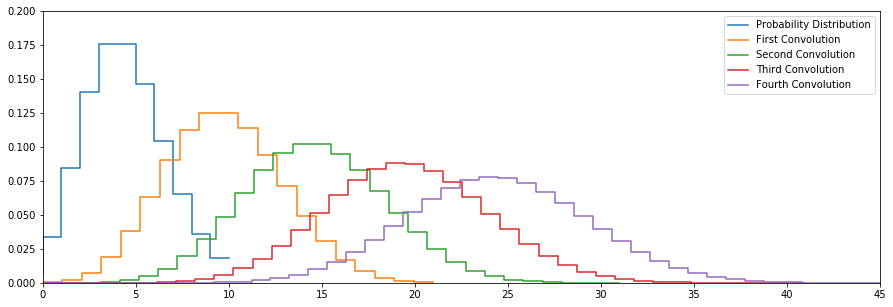

In [133]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

x0 = np.linspace(0, 10, 11)
dist = stats.poisson.pmf(x0, 5)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, dist)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, dist)
x3 = np.linspace(0, len(conv3), len(conv3))

conv4 = np.convolve(conv3, dist)
x4 = np.linspace(0, len(conv4), len(conv4))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.step(x0, dist, label='Probability Distribution')
ax.step(x1, conv1, label='First Convolution')
ax.step(x2, conv2, label='Second Convolution')
ax.step(x3, conv3, label='Third Convolution')
ax.step(x4, conv4, label='Fourth Convolution')
ax.set_xlim(0, 45)
ax.set_ylim(0, 0.2)

ax.legend(loc='best')
plt.show()


The blue line shows the probability mass function for the poisson distribution. I've then plotted the next four convolutions of the distribution with itself, as we sum the backgrounds over a couple more days. Each time you sum for another day the distribution broadens and its center shifts in the positive direction. 

### __(B)__

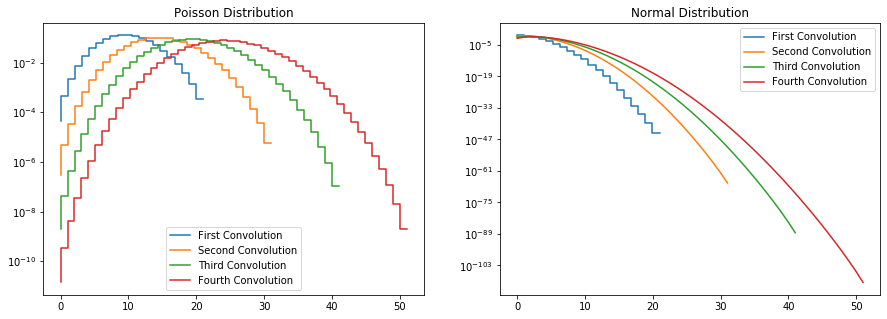

In [134]:
x = np.linspace(0, 10, 11)
norm = stats.norm.pdf(x)

conv5 = np.convolve(norm, norm)
x5 = np.linspace(0, len(conv5), num=len(conv5))

conv6 = np.convolve(conv5, norm)
x6 = np.linspace(0, len(conv6), num=len(conv6))

conv7 = np.convolve(conv6, norm)
x7 = np.linspace(0, len(conv7), num=len(conv7))

conv8 = np.convolve(conv7, norm)
x8 = np.linspace(0, len(conv8), num=len(conv8))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Poisson Distribution')
ax[0].step(x1, conv1, label='First Convolution')
ax[0].step(x2, conv2, label='Second Convolution')
ax[0].step(x3, conv3, label='Third Convolution')
ax[0].step(x4, conv4, label='Fourth Convolution')

ax[0].semilogy()
ax[0].legend(loc='best')

ax[1].set_title('Normal Distribution')
ax[1].step(x5, conv5, label='First Convolution')
ax[1].plot(x6, conv6, label='Second Convolution')
ax[1].plot(x7, conv7, label='Third Convolution')
ax[1].plot(x8, conv8, label='Fourth Convolution')

ax[1].semilogy()
ax[1].legend(loc='best')

plt.show()

Looking at the probability distibution ta first observation would be that the distribution of the summed data over 5 days, the red function on the plot from (A), is gaussian, but plotting the probability distribution on a log scale it is clear that the function doesn't have the quadratic shape associated with a gaussian distribution plotted on a log scale, so we can rule out our probability distribution being gaussian. 

It also makes sence intuitively that the sum of a poisson distribution is a poisson distribution because by definition a poisson distribution is the probability of a certain number of events occuring in a given period of time and and after summing for 5 days our distribution just represents the probability of a certain number of events occuring in a 5 day time period, instead of a 1 day time period.

### __(C)__

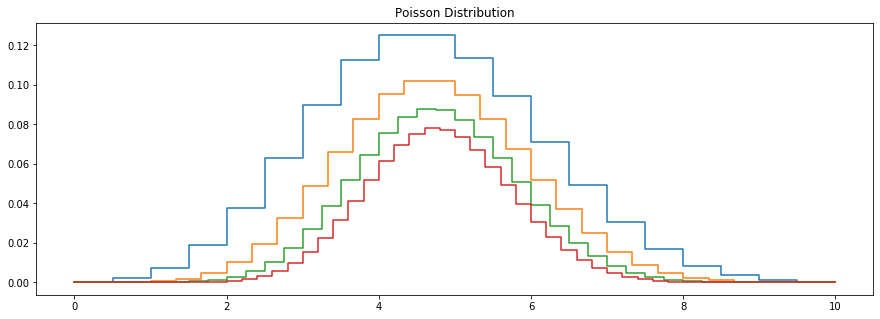

In [135]:
x0 = np.linspace(0, 10, 11)
dist = stats.poisson.pmf(x0, 5)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, 10, len(conv1))

conv2 = np.convolve(conv1, dist)
x2 = np.linspace(0, 10, len(conv2))

conv3 = np.convolve(conv2, dist)
x3 = np.linspace(0, 10, len(conv3))

conv4 = np.convolve(conv3, dist)
x4 = np.linspace(0, 10, len(conv4))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.set_title('Poisson Distribution')
ax.step(x1, conv1, label='First Convolution')
ax.step(x2, conv2, label='Second Convolution')
ax.step(x3, conv3, label='Third Convolution')
ax.step(x4, conv4, label='Fourth Convolution')

plt.show()

To average our distribution, instead of summing for each day, all that needs to be done is to rescale the x-axis to be properly normalized.

Using the plot above we can see that the PDF function, blue line, is the sharpest distribution and is skewed with the tail of the distribution being longer than the head. As we average over more and more days the probability distributions flattens out over a more broad range of values and becomes more symmetric about its mean. The central limit theorem states that sum of random independent variables tends to a gaussian distribution. From our graph above we can see that as we continue to average over more and more days our distribution will approach that of a normal distribution with $\mu=5$. 

### __(D)__

After 7 days, with the average gamma-rays emitted from my source being 8, we would have seen 56 gamma rays.

In [144]:
conv5_poisson = np.convolve(conv4, dist)

conv6_poisson = np.convolve(conv5_poisson, dist)

events = 56

cdf = 0
for i in range(events + 1):
    cdf += conv6_poisson[i]
ppf = np.abs(stats.norm.ppf(1 - cdf))

print(str(ppf) + '\u03C3')

1.3282183239687204σ


First we will want to convolve the distribution 2 more times to sum for 7 days, then we can integrate from 0 to 56 to get the probability of the background giving you less signal like (less than 56 gamma rays per 7 days) than our measured signal value, then subtract that from 1 to get the probability of the background giving you a signal that is just as signal like or more signal like (greater than or equal to 56 gamma-rays per 7 days) than the measured signal value.  The sigma of our observation is 1.33. 

## Question 2

### __(A)__

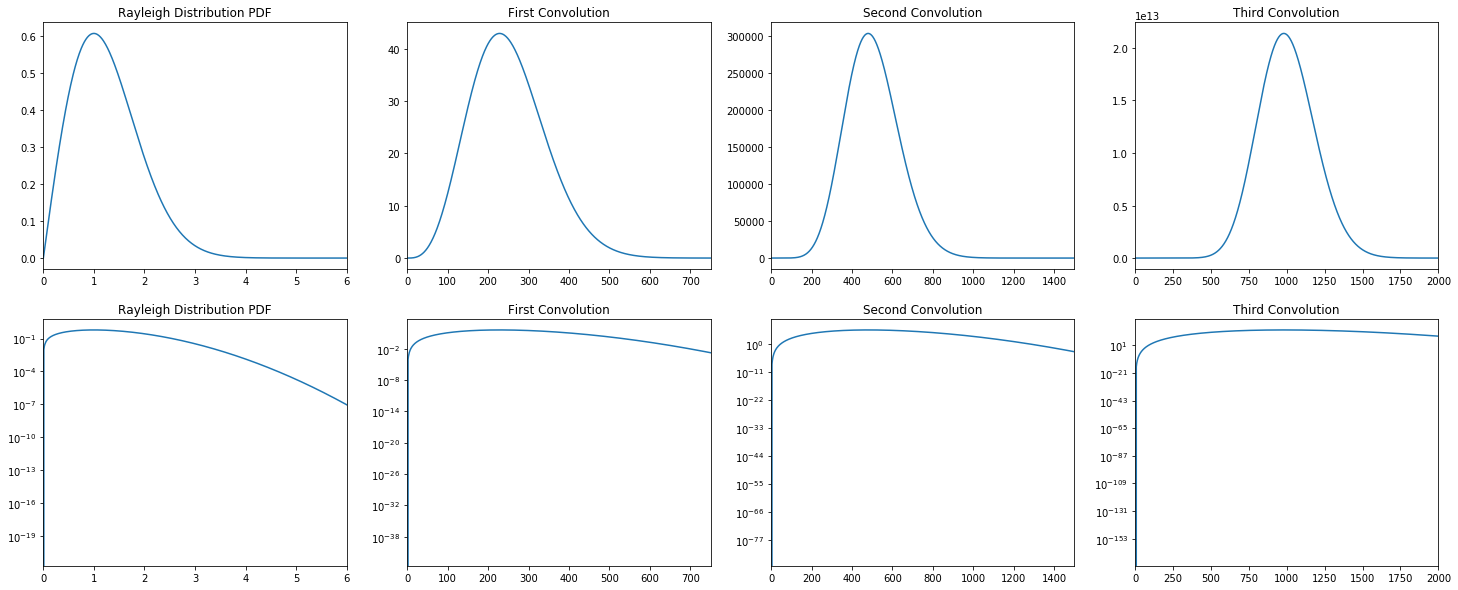

In [146]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

fig, ax = plt.subplots(2, 4, figsize=(25, 10))

x = np.linspace(0, 10, 1000)
dist = stats.rayleigh.pdf(x)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, conv1)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, conv2)
x3 = np.linspace(0, len(conv3), len(conv3))

ax[0,0].plot(x, dist, label='PDF')
ax[0,0].set_xlim(0, 6)
ax[0,0].set_title("Rayleigh Distribution PDF")

ax[0,1].plot(x1, conv1)
ax[0,1].set_xlim(0, 750)
ax[0,1].set_title("First Convolution")

ax[0,2].plot(x2, conv2)
ax[0,2].set_xlim(0, 1500)
ax[0,2].set_title("Second Convolution")

ax[0,3].plot(x3, conv3)
ax[0,3].set_xlim(0, 2000)
ax[0,3].set_title("Third Convolution")

ax[1,0].plot(x, dist, label='PDF')
ax[1,0].set_xlim(0, 6)
ax[1,0].semilogy()
ax[1,0].set_title("Rayleigh Distribution PDF")

ax[1,1].plot(x1, conv1)
ax[1,1].set_xlim(0, 750)
ax[1,1].semilogy()
ax[1,1].set_title("First Convolution")

ax[1,2].plot(x2, conv2)
ax[1,2].set_xlim(0, 1500)
ax[1,2].semilogy()
ax[1,2].set_title("Second Convolution")

ax[1,3].plot(x3, conv3)
ax[1,3].set_xlim(0, 2000)
ax[1,3].semilogy()
ax[1,3].set_title("Third Convolution")

plt.show()

The rayleigh distribution is skewed with a much longer tail than head of the of the distribution. As we convolve the distribution with itself its shape shifts the the right, the range broadens but the height increased (notice the scale of the y-axis on each plot), instead of decreasing like the poisson distribution did. 

### __(B)__

The shape of the distribution quickly approaches a gaussian distribution, which is being judged by eye of the symmetry of the distribution, within about 3 convolutions. This is just a visual identification, however the central limit theorem states that the sum of random independent variables will approach a gaussian distribution so as we sum for more and more days a gaussian distribution will be a much better approximation that just 3 convolutions.

## Question 3

### Version 1

### __(A)__

In [148]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

prob = 1 - stats.norm.cdf(5.56, loc=0, scale=1)
ppf = np.abs(stats.norm.ppf(prob))
print("Probability = " + str(prob))
print("%f\u03C3" % (ppf))

Probability = 1.3488732464317366e-08
5.560000σ


With a background gaussian distribution with a width of 1 (normal distribution) and a signal strength of 5.56 (brightness units) the significance of our detection is 5.50$\sigma$ or there is a probability of 1.348e-08 that our background gave us a signal that was equally or more bright than our measured signal strength. This is enough to claim a discovery with the 5$\sigma$ standard. 

### Version 2

### __(B)__

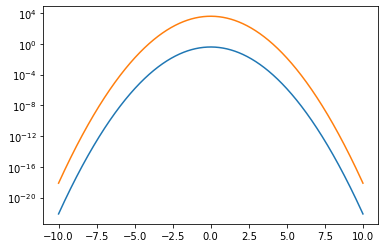

In [102]:
x = np.linspace(-10, 10, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1)
scaled_pdf = pdf * 10000

plt.plot(x, pdf)
plt.plot(x, scaled_pdf)
plt.semilogy()
plt.show()

In version 1 we were dealing with just one pixal so the statistical question was what was the probability that the background would give you a signal that was equally or more bright than the measured signal value in just one pixal. Now the statistical question is what is the probability that the background would give you a signal that was equally or more bright than the measured signal value over all 10000 pixals. We could do this either by convolving the distribution 10000 times or get a good approximation by scaling the distribution up 10000 times to include all the new data points. The plot above shows the distribution before, in blue, and after, in yellow, the scaling.

### __(C)__

In [149]:
scaled_prob = prob * 10000
print(scaled_prob)
scaled_ppf = np.abs(stats.norm.ppf(scaled_prob))
print("%f\u03C3" % (scaled_ppf))

0.00013488732464317366
3.642718σ


We can use the probability calculated for part (A) and scale it 10000 times, as described in part (B), to get the probability of the background giving you a signal that was equally or more bright than the measured signal value over all 10000 pixals. The significance of the detection is then 3.642$\sigma$.

## Question 4

### __(A)__

In [150]:
val = 5
prob = 1 - stats.norm.cdf(val)
signal = np.abs(stats.norm.ppf(prob))
print("signal = " + str(signal))

signal = 4.999999999970176


Since we are using a standard normal distribution a 5$\sigma$ detection would require just 5 brightness units above the mean, which means without any calculation we already know the value should be very close to 5. So we can use the value of 5 to derive the needed signal brightness.

### __(B)__

In [151]:
scaled_prob = prob / 10000
scaled_signal = np.abs(stats.norm.ppf(scaled_prob))
print("signal = " + str(scaled_signal))

signal = 6.550537612682236


Working backwards from what we did in question 3 part (C), we first scale the sigma value down 10000 times and then we can use that derive the signal brightness.

### __(C)__

In [124]:
perc = (scaled_signal / signal) * 100
print("%5.5f%s" %(perc, "%"))

131.01075%


The ratio of the 10000 trial factor signal to the 1 trial factor signal is 0.131 which means for a trial factor of 10000 the signal only needs to be about 31% brighter. If you look at the probability distributions from question 3 part (B) you can see that the ends of the distribution lie closer together than the center of the distribution so at 5$\sigma$, which is pretty far from the center of the distribution, the differences between the two distributions gets smaller which is why the sensitivity penalty is lower.

### __(D)__

If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [152]:
scaled_prob2 = prob / 1000
scaled_signal2 = np.abs(stats.norm.ppf(scaled_prob2))
print(scaled_signal2)

perc = (scaled_signal2 / signal) * 100
print("1000 trial factor: %5.5f%s" %(perc, "%"))

scaled_prob3 = prob / 100000
scaled_signal3 = np.abs(stats.norm.ppf(scaled_prob3))
print(scaled_signal3)

perc = (scaled_signal3 / signal) * 100
print("100000 trial factor: %5.5f%s" %(perc, "%"))

6.1976008229117365
1000 trial factor: 123.95202%
6.88613071907523
100000 trial factor: 137.72261%


Changing the trial factor by an order of magnitude changes the sensitivity threshold very little. As found above the 10000 trial factor only needed to be about 31% brighter than the 1 trial factor signal. A magnitude greater of a trial factor, 100000, only needs to be 37% brighter and an order of magnitude smaller, 1000, and the signal only needed to be 23% brighter. This is for the same reason the sensitivity penalty was low for my previous anser in part (C), the closer to the ends of the distribution you are, which 5$\sigma$ is at, the smaller the difference between the distributions are.